In [1]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd

C:\Users\User\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
slp_score_data = pd.read_csv("../EDA/slp_score_data.csv")
sleep_data = pd.read_csv("../EDA/sleep_data.csv")
wellness_data = pd.read_csv("../EDA/wellness_data.csv")

In [3]:

metadata_slp_score = SingleTableMetadata()
metadata_slp_score.detect_from_dataframe(slp_score_data)
metadata_slp_score.set_primary_key(column_name='sleep_log_entry_id')

# Initialise the synthesizer
synthesizer_slp_score = CTGANSynthesizer(metadata_slp_score)
synthesizer_slp_score.fit(slp_score_data)

# Generate synthetic data (20% overall data is synthetic)
slp_score_synthetic = synthesizer_slp_score.sample(459)

C:\Users\User\anaconda3\Lib\site-packages\sdv\metadata\single_table.py:778: UserWarning: There is an existing primary key 'sleep_log_entry_id'. This key will be removed.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\User\anaconda3\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [4]:
slp_score_synthetic

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,participant_id,date
0,2019-12-24 04:23:51,11869229,65,23,20,27,77,58,0.020892,p11,2019-11-06
1,2020-03-30 16:29:30,624179,74,21,9,30,35,71,0.034417,p04,2020-03-15
2,2020-03-22 23:35:07,1890655,80,21,20,44,61,62,0.058161,p08,2020-03-14
3,2020-01-12 00:53:55,9561549,78,18,21,42,54,68,0.072856,p01,2020-01-02
4,2019-11-10 10:37:07,5924239,63,19,5,36,128,45,0.037143,p11,2019-11-10
...,...,...,...,...,...,...,...,...,...,...,...
454,2020-01-06 10:41:57,14865037,58,21,8,32,0,63,0.110210,p16,2020-03-30
455,2020-02-04 03:41:43,2749024,73,24,10,46,87,61,0.024835,p11,2020-02-01
456,2020-02-20 06:28:13,14184454,70,19,9,46,133,51,0.057366,p10,2020-03-03
457,2020-03-18 05:41:23,15413187,80,21,9,38,9,70,0.060993,p16,2019-12-02


In [5]:
# some datasets have sa,e lodIDs but the second one has more detailed information in the "levels" column
sleep_data = sleep_data.drop_duplicates(subset='logId', keep='last')
sleep_data = sleep_data.reset_index(drop=True)


In [6]:
# Remove exact duplicates across all columns
sleep_data = sleep_data.drop_duplicates()

metadata_sleep = SingleTableMetadata()
metadata_sleep.detect_from_dataframe(sleep_data)
metadata_sleep.update_column(column_name='logId', sdtype='id')
metadata_sleep.set_primary_key(column_name='logId')

# Initialize the synthesizer
synthesizer_sleep = CTGANSynthesizer(metadata_sleep)
synthesizer_sleep.fit(sleep_data)

# Generate synthetic data
sleep_synthetic = synthesizer_sleep.sample(500)

C:\Users\User\anaconda3\Lib\site-packages\sdv\metadata\single_table.py:778: UserWarning: There is an existing primary key 'logId'. This key will be removed.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\User\anaconda3\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [55]:
sleep_data

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep,participant_id,date
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,430.0,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True,p01,2019-11-02
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,422.0,0,378,44,0,422,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True,p01,2019-11-03
2,24507914069,2019-11-04,2019-11-03 23:55:30,2019-11-04T06:35:00.000,399.0,0,361,38,0,399,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True,p01,2019-11-04
3,24521896102,2019-11-05,2019-11-05 00:22:30,2019-11-05T06:25:00.000,362.0,0,326,36,1,362,99,stages,0,"{'summary': {'deep': {'count': 1, 'minutes': 2...",True,p01,2019-11-05
4,24534036899,2019-11-06,2019-11-06 00:25:30,2019-11-06T06:29:30.000,364.0,0,341,23,1,364,99,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 6...",True,p01,2019-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,26495767462,2020-03-27,2020-03-27 03:43:00,2020-03-27T12:19:30.000,516.0,0,469,47,0,516,92,stages,0,"{'summary': {'deep': {'count': 9, 'minutes': 1...",True,p16,2020-03-27
1997,26507885399,2020-03-28,2020-03-28 04:50:30,2020-03-28T12:39:00.000,468.0,0,419,49,4,468,95,stages,0,"{'summary': {'deep': {'count': 6, 'minutes': 8...",True,p16,2020-03-28
1998,26519603409,2020-03-29,2020-03-29 05:02:30,2020-03-29T13:43:00.000,520.0,0,442,78,10,520,96,stages,0,"{'summary': {'deep': {'count': 6, 'minutes': 9...",True,p16,2020-03-29
1999,26532874137,2020-03-30,2020-03-30 04:58:00,2020-03-30T14:02:00.000,544.0,0,485,59,1,544,94,stages,0,"{'summary': {'deep': {'count': 9, 'minutes': 1...",True,p16,2020-03-30


In [7]:
sleep_synthetic
#the lvels are not sampled properly as they are very detailed and are objects instead of tabular data.
#will be possible if extracted and saved into modulat data

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep,participant_id,date
0,13969423,2019-11-01,2020-01-04 16:53:51,2020-01-03T20:05:03.020491,606.0,0,320,102,0,547,92,stages,0,sdv-pii-0fat1,True,p09,2019-11-01
1,5850406,2020-02-22,2020-02-11 01:18:13,2020-02-22T13:17:06.730123,596.0,0,261,41,0,490,97,stages,0,sdv-pii-vkpgh,True,p10,2019-12-18
2,2775440,2019-11-05,2019-12-06 10:40:35,2020-01-01T18:14:16.382939,202.0,0,106,17,0,139,88,classic,2,sdv-pii-wo044,False,p06,2019-11-17
3,420197,2019-12-01,2019-12-06 10:31:04,2019-11-10T02:53:59.030395,501.0,0,314,53,0,350,91,stages,0,sdv-pii-wg79b,True,p01,2020-03-31
4,2798464,2019-11-07,2019-12-09 15:03:41,2019-11-09T17:00:36.054887,200.0,0,67,3,0,60,91,classic,2,sdv-pii-5wr6d,False,p12,2019-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1738488,2019-11-01,2020-01-15 13:35:34,2019-11-01T18:38:58.707980,631.0,0,385,85,0,360,100,stages,0,sdv-pii-xe5lq,True,p06,2020-02-29
496,8146116,2019-12-08,2019-12-30 07:02:30,2020-01-20T02:38:18.452170,143.0,0,39,11,0,60,96,classic,2,sdv-pii-e5o4l,False,p04,2019-11-15
497,10503324,2019-12-01,2020-02-17 19:53:54,2019-11-04T20:55:36.435291,557.0,0,315,17,0,298,95,stages,0,sdv-pii-ia1d4,True,p16,2019-11-10
498,8837500,2019-11-01,2020-02-12 18:27:32,2019-11-20T12:47:38.337668,157.0,0,39,0,0,60,95,classic,2,sdv-pii-jtla3,False,p14,2020-01-15


In [8]:
wellness_data['row_id'] = range(len(wellness_data))

In [9]:
metadata_wellness = SingleTableMetadata()
metadata_wellness.detect_from_dataframe(wellness_data)
metadata_wellness.update_column(column_name='row_id', sdtype='id')
metadata_wellness.set_primary_key(column_name='row_id')

# Initialize the synthesizer
synthesizer_wellness = CTGANSynthesizer(metadata_wellness)
synthesizer_wellness.fit(wellness_data)

# Generate synthetic data
wellness_synthetic = synthesizer_wellness.sample(437)

C:\Users\User\anaconda3\Lib\site-packages\sdv\metadata\single_table.py:778: UserWarning: There is an existing primary key 'effective_time_frame'. This key will be removed.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\User\anaconda3\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [10]:
wellness_synthetic

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress,participant_id,date,row_id
0,sdv-id-sRSgmN,2,3,10,5,3,1,"[12921003, 368208006, 368209003, 69536005]",3,p04,2020-02-10,2332629
1,sdv-id-BSnwtx,3,4,6,8,4,2,[],4,p08,2019-12-17,1932597
2,sdv-id-SmgwNl,2,3,6,8,2,1,[22943007],3,p13,2019-11-07,11334128
3,sdv-id-TfmTVX,3,3,4,9,2,3,[],2,p10,2019-11-07,4836580
4,sdv-id-sBkMtF,1,3,9,6,4,3,[],3,p08,2019-11-26,6934474
...,...,...,...,...,...,...,...,...,...,...,...,...
432,sdv-id-HPhTBJ,3,3,7,7,2,4,"[48979004, 32696007, 12921003]",2,p04,2020-02-28,2500164
433,sdv-id-oUYZRj,2,1,6,3,3,3,[],4,p13,2020-03-20,2556830
434,sdv-id-XGlSiN,5,3,3,7,3,3,[12921003],3,p04,2019-12-05,9098820
435,sdv-id-wIipIa,3,3,3,6,3,3,[],3,p06,2020-03-02,14816356


Comparisons

In [12]:
print(slp_score_data.describe())
print(slp_score_synthetic.describe())

       sleep_log_entry_id  overall_score  composition_score  \
count        1.836000e+03    1836.000000        1836.000000   
mean         2.547399e+10      76.460784          19.247277   
std          5.802740e+08       7.795554           2.390916   
min          2.447239e+10      35.000000          12.000000   
25%          2.496905e+10      72.000000          17.000000   
50%          2.543212e+10      77.000000          19.500000   
75%          2.596353e+10      82.000000          21.000000   
max          2.654316e+10      94.000000          25.000000   

       revitalization_score  duration_score  deep_sleep_in_minutes  \
count           1836.000000     1836.000000            1836.000000   
mean              18.960784       38.252723              73.258170   
std                3.316146        5.146081              27.728065   
min                5.000000        3.000000               0.000000   
25%               17.000000       35.000000              55.000000   
50%         

In [29]:
slp_score_final = pd.concat([slp_score_data, slp_score_synthetic], ignore_index=True)
slp_score_final = slp_score_final.sample(frac=1, random_state=42).reset_index(drop=True)
print(slp_score_final.describe())

       sleep_log_entry_id  overall_score  composition_score  \
count        2.295000e+03    2295.000000        2295.000000   
mean         2.038081e+10      75.311111          19.429194   
std          1.020178e+10       8.534148           2.365496   
min          1.541000e+04      35.000000          12.000000   
25%          2.465177e+10      70.000000          18.000000   
50%          2.517684e+10      76.000000          20.000000   
75%          2.582540e+10      81.000000          21.000000   
max          2.654316e+10      94.000000          25.000000   

       revitalization_score  duration_score  deep_sleep_in_minutes  \
count           2295.000000     2295.000000            2295.000000   
mean              18.589107       38.122004              72.967320   
std                3.675215        5.453530              28.907019   
min                5.000000        3.000000               0.000000   
25%               16.000000       35.000000              54.000000   
50%         

In [13]:
print(sleep_data.describe())
print(sleep_synthetic.describe())

              logId     duration  minutesToFallAsleep  minutesAsleep  \
count  2.001000e+03  2001.000000          2001.000000    2001.000000   
mean   2.547448e+10   443.770115             0.037481     387.005997   
std    5.868450e+08   131.613845             0.903379     112.257017   
min    2.447235e+10    60.000000             0.000000      39.000000   
25%    2.496668e+10   396.000000             0.000000     348.000000   
50%    2.543031e+10   461.000000             0.000000     401.000000   
75%    2.596431e+10   518.000000             0.000000     453.000000   
max    2.655419e+10   953.000000            35.000000     823.000000   

       minutesAwake  minutesAfterWakeup    timeInBed   efficiency     infoCode  
count   2001.000000         2001.000000  2001.000000  2001.000000  2001.000000  
mean      56.454273            0.753623   443.770115    94.321839     0.142929  
std       25.289761            2.105414   131.613845     4.624756     0.510452  
min        0.000000        

In [31]:
sleep_final = pd.concat([sleep_data, sleep_synthetic], ignore_index=True)
sleep_final = sleep_final.sample(frac=1, random_state=42).reset_index(drop=True)
print(sleep_final.describe())

              logId     duration  minutesToFallAsleep  minutesAsleep  \
count  2.501000e+03  2501.000000          2501.000000    2501.000000   
mean   2.038331e+10   444.982807             0.288285     363.045182   
std    1.020043e+10   145.808650             2.652331     126.374896   
min    6.282500e+04    60.000000             0.000000      39.000000   
25%    2.464285e+10   392.000000             0.000000     318.000000   
50%    2.517672e+10   466.000000             0.000000     386.000000   
75%    2.582945e+10   532.000000             0.000000     441.000000   
max    2.655419e+10   953.000000            35.000000     823.000000   

       minutesAwake  minutesAfterWakeup    timeInBed   efficiency     infoCode  
count   2501.000000         2501.000000  2501.000000  2501.000000  2501.000000  
mean      52.548181            0.713715   417.616953    94.529788     0.219112  
std       26.855312            2.033226   147.723871     4.450035     0.613816  
min        0.000000        

In [14]:
print(wellness_data.describe())
print(wellness_synthetic.describe())

           fatigue         mood    readiness  sleep_duration_h  sleep_quality  \
count  1747.000000  1747.000000  1747.000000       1747.000000    1747.000000   
mean      2.709216     3.195764     4.946766          6.717802       3.013738   
std       0.679550     0.640844     1.926788          1.338879       0.752114   
min       0.000000     0.000000     0.000000          0.000000       0.000000   
25%       2.000000     3.000000     4.000000          6.000000       3.000000   
50%       3.000000     3.000000     5.000000          7.000000       3.000000   
75%       3.000000     4.000000     6.000000          8.000000       3.000000   
max       5.000000     5.000000    10.000000         12.000000       5.000000   

          soreness       stress       row_id  
count  1747.000000  1747.000000  1747.000000  
mean      2.826560     2.906125   873.000000  
std       0.601853     0.722968   504.459777  
min       0.000000     0.000000     0.000000  
25%       3.000000     3.000000   4

In [33]:
wellness_final = pd.concat([wellness_data, wellness_synthetic], ignore_index=True)
wellness_final = wellness_final.sample(frac=1, random_state=42).reset_index(drop=True)
print(wellness_final.describe())

           fatigue         mood    readiness  sleep_duration_h  sleep_quality  \
count  2184.000000  2184.000000  2184.000000       2184.000000    2184.000000   
mean      2.680861     3.179029     4.902473          6.733059       3.039377   
std       0.755666     0.736148     1.927954          1.331010       0.810663   
min       0.000000     0.000000     0.000000          0.000000       0.000000   
25%       2.000000     3.000000     4.000000          6.000000       3.000000   
50%       3.000000     3.000000     5.000000          7.000000       3.000000   
75%       3.000000     4.000000     6.000000          8.000000       4.000000   
max       5.000000     5.000000    10.000000         12.000000       5.000000   

         soreness       stress        row_id  
count  2184.00000  2184.000000  2.184000e+03  
mean      2.79304     2.895604  1.729102e+06  
std       0.70547     0.809981  4.068030e+06  
min       0.00000     0.000000  0.000000e+00  
25%       2.00000     2.000000  5.4

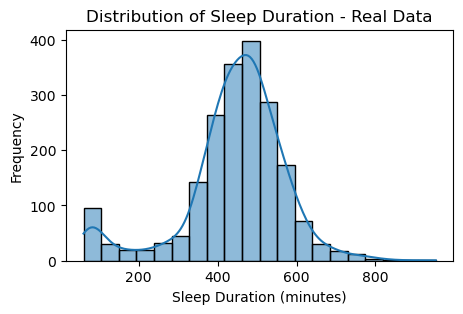

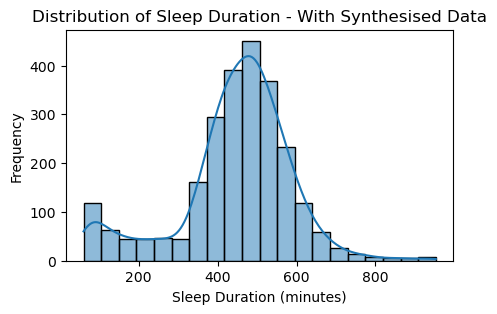

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.histplot(sleep_data["duration"], bins=20, kde=True)
plt.title("Distribution of Sleep Duration - Real Data")
plt.xlabel("Sleep Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(sleep_final["duration"], bins=20, kde=True)
plt.title("Distribution of Sleep Duration - With Synthesised Data")
plt.xlabel("Sleep Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

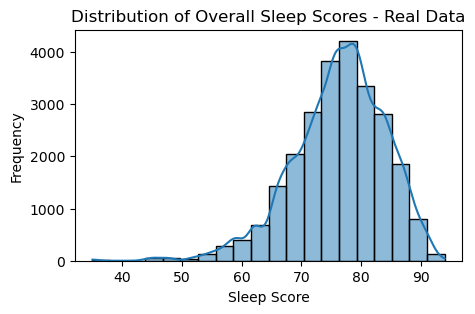

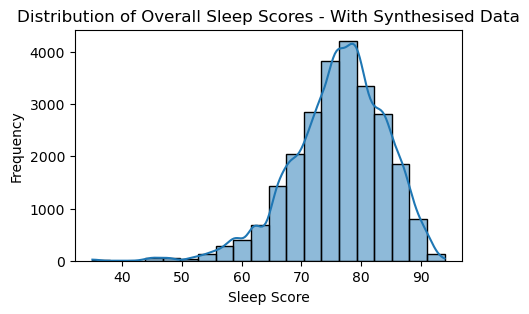

In [53]:
merged_sleep_score_data = pd.merge(sleep_data, slp_score_data, on="date", how="inner")

plt.figure(figsize=(5,3))
sns.histplot(merged_sleep_score_data['overall_score'], bins=20, kde=True)
plt.title("Distribution of Overall Sleep Scores - Real Data")
plt.xlabel("Sleep Score")
plt.ylabel("Frequency")
plt.show()

merged_sleep_score_final = pd.merge(sleep_final, slp_score_final, on="date", how="inner")

plt.figure(figsize=(5,3))
sns.histplot(merged_sleep_score_data['overall_score'], bins=20, kde=True)
plt.title("Distribution of Overall Sleep Scores - With Synthesised Data")
plt.xlabel("Sleep Score")
plt.ylabel("Frequency")
plt.show()

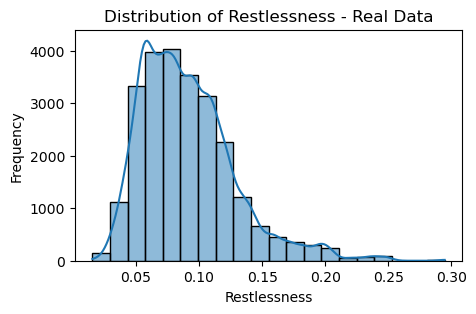

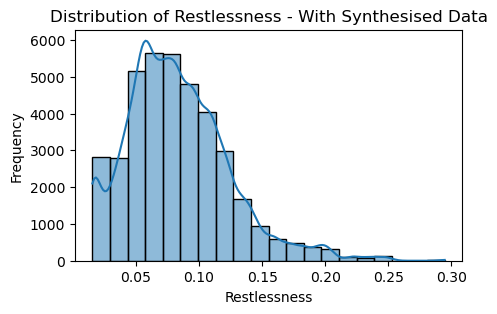

In [49]:
plt.figure(figsize=(5,3))
sns.histplot(merged_sleep_score_data['restlessness'], bins=20, kde=True)
plt.title("Distribution of Restlessness - Real Data")
plt.xlabel("Restlessness")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5,3))
sns.histplot(merged_sleep_score_final['restlessness'], bins=20, kde=True)
plt.title("Distribution of Restlessness - With Synthesised Data")
plt.xlabel("Restlessness")
plt.ylabel("Frequency")
plt.show()